# DEVELOPING A MACHINE LEARNING MODEL THAT DETECTS WHETHER A PATIENT HAS DIABETES OR NOT

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# to ignore warnings

import warnings 
warnings.filterwarnings('ignore')

In [3]:
# laoding the dataset

df=pd.read_csv("diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
# printing the first five rows of the data

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
# to know the shape of the data, no. of rows and columns

df.shape

(768, 9)

In [6]:
# to know the summary of the data (memory usage, no. of non-null data, index and columns, datatypes)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# to know the statistics of the data

df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
# replacing 0s

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0      NaN  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [10]:
# to know which columns have how much null values

df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# replacing missing/0 values of glucose column

df.Glucose.fillna(df.Glucose.mean(), inplace=True)

In [15]:
# replacing missing/0 values of blood pressure column

df.BloodPressure.fillna(df.BloodPressure.mean(), inplace=True) 

In [16]:
# replacing missing/0 values of skin thickness column

df.SkinThickness.fillna(df.SkinThickness.mean(), inplace=True)

In [17]:
# replacing missing/0 values of insulin column

df.Insulin.fillna(df.Insulin.mean(), inplace=True)

In [18]:
# replacing missing/0 values of bmi column

df.BMI.fillna(df.BMI.mean(), inplace=True) 

In [19]:
# checking null values again

df.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

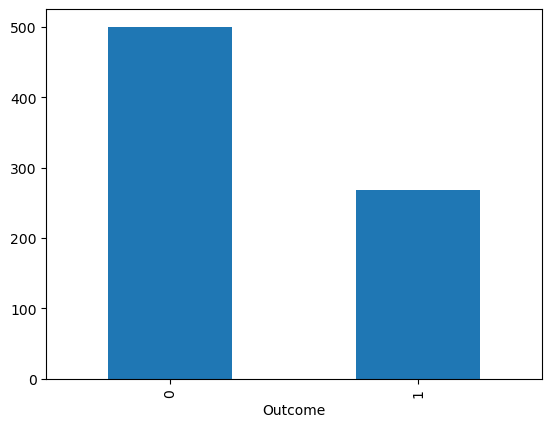

In [21]:
df.Outcome.value_counts().plot(kind="bar")
plt.show()

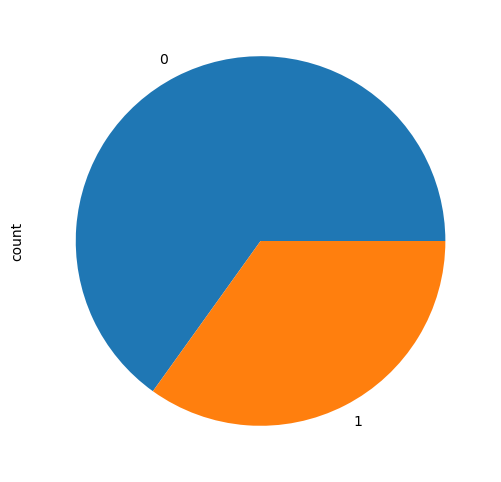

In [22]:
plt.figure(figsize=(10,6))
df.Outcome.value_counts().plot(kind="pie")
plt.show()

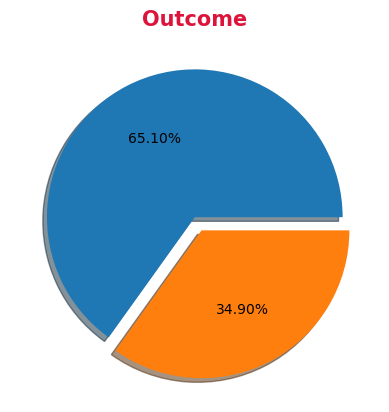

In [23]:
plt.pie(df.Outcome.value_counts(), shadow = True, autopct = '%.2f%%', explode = [0.0,0.1])
plt.title('Outcome', fontweight = 'bold', fontsize = 15 , pad = 5, color = 'crimson')
plt.show()

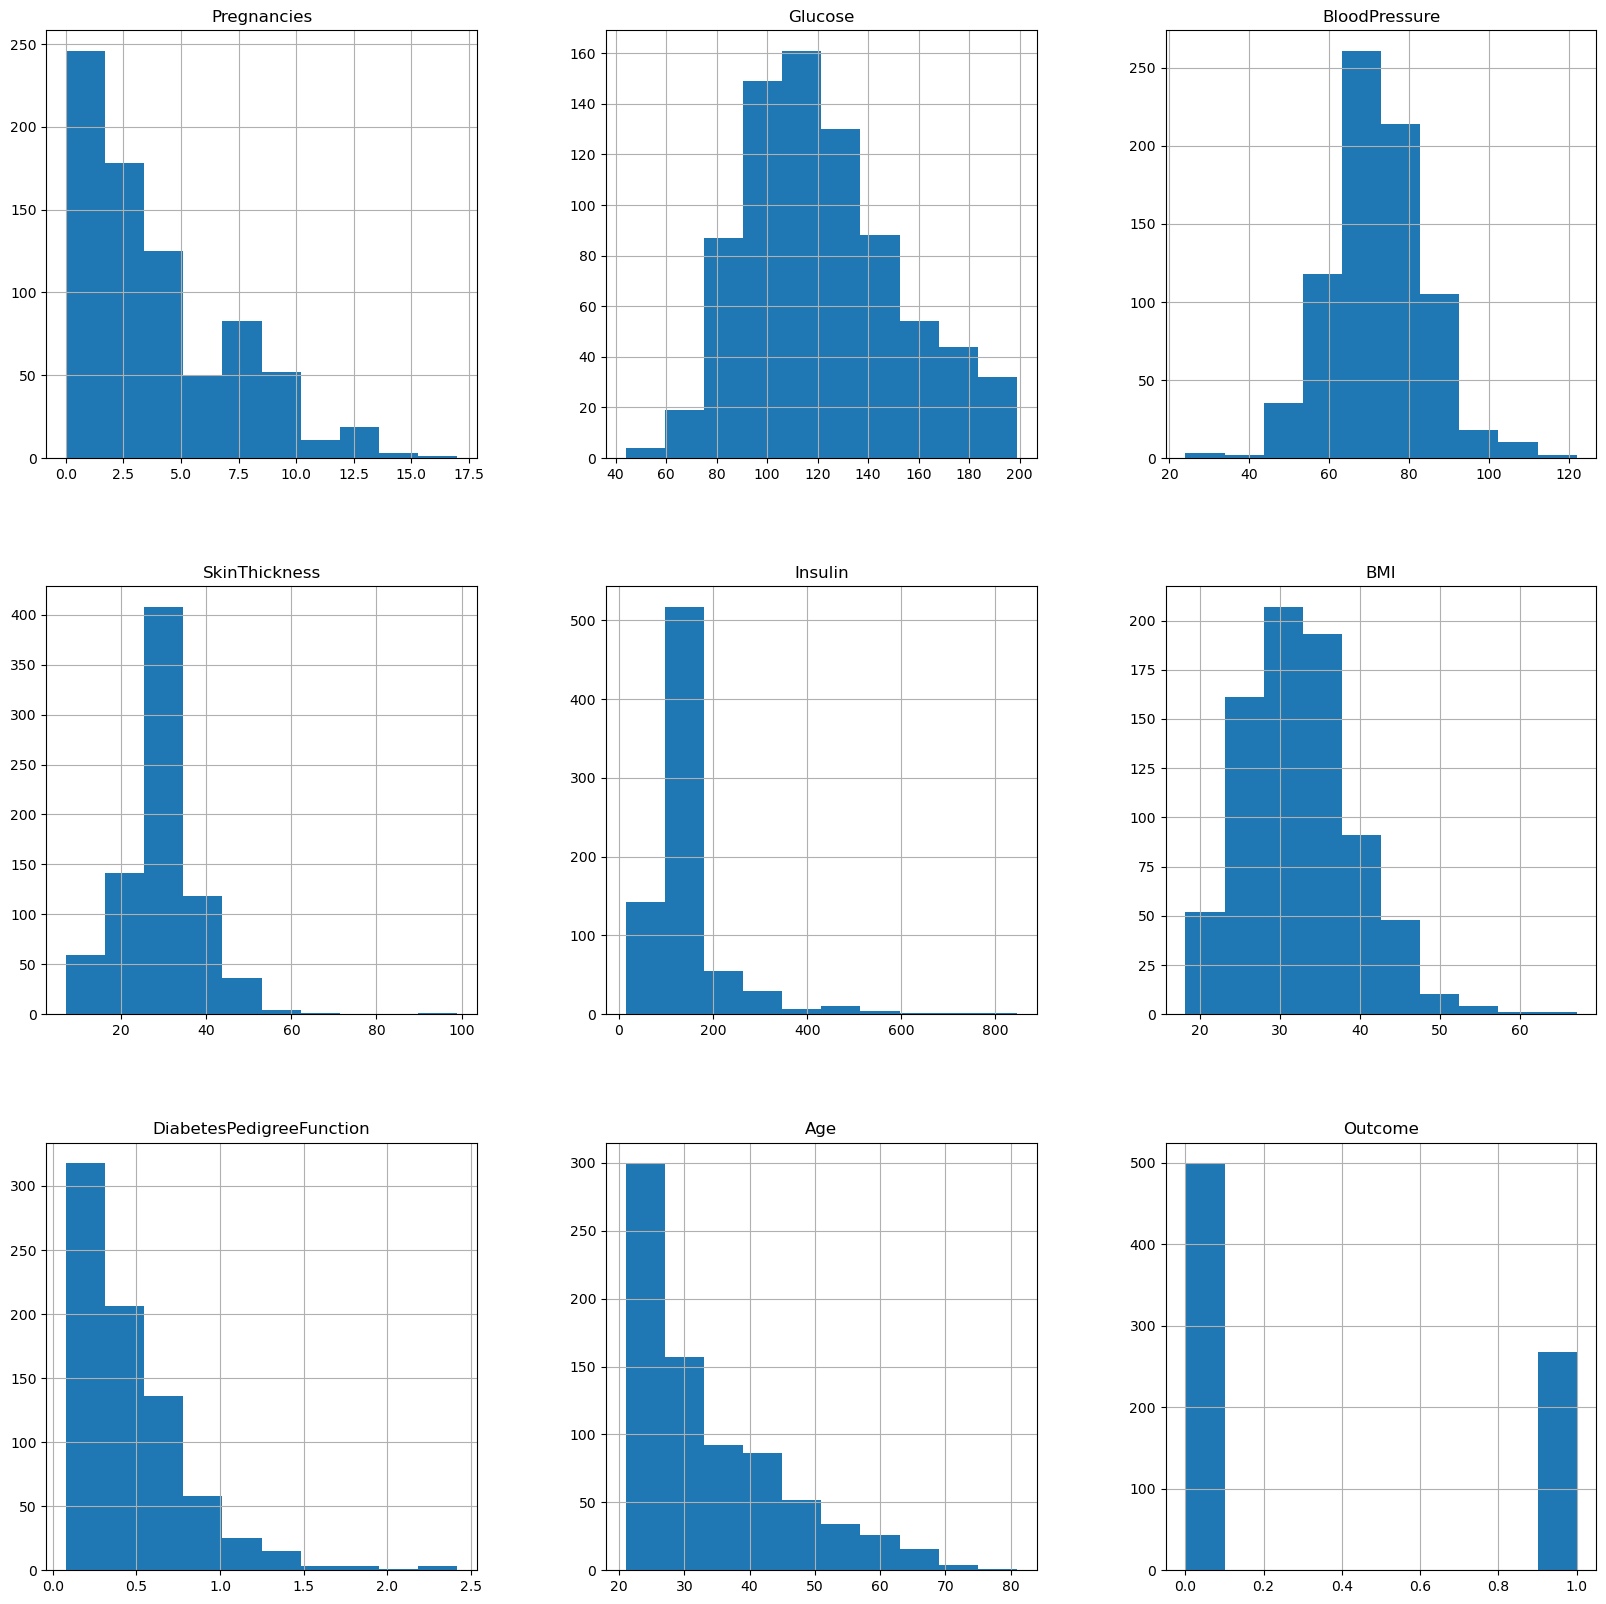

In [24]:
df.hist(figsize=(20,20))
plt.show()

In [25]:
from pandas.plotting import scatter_matrix 

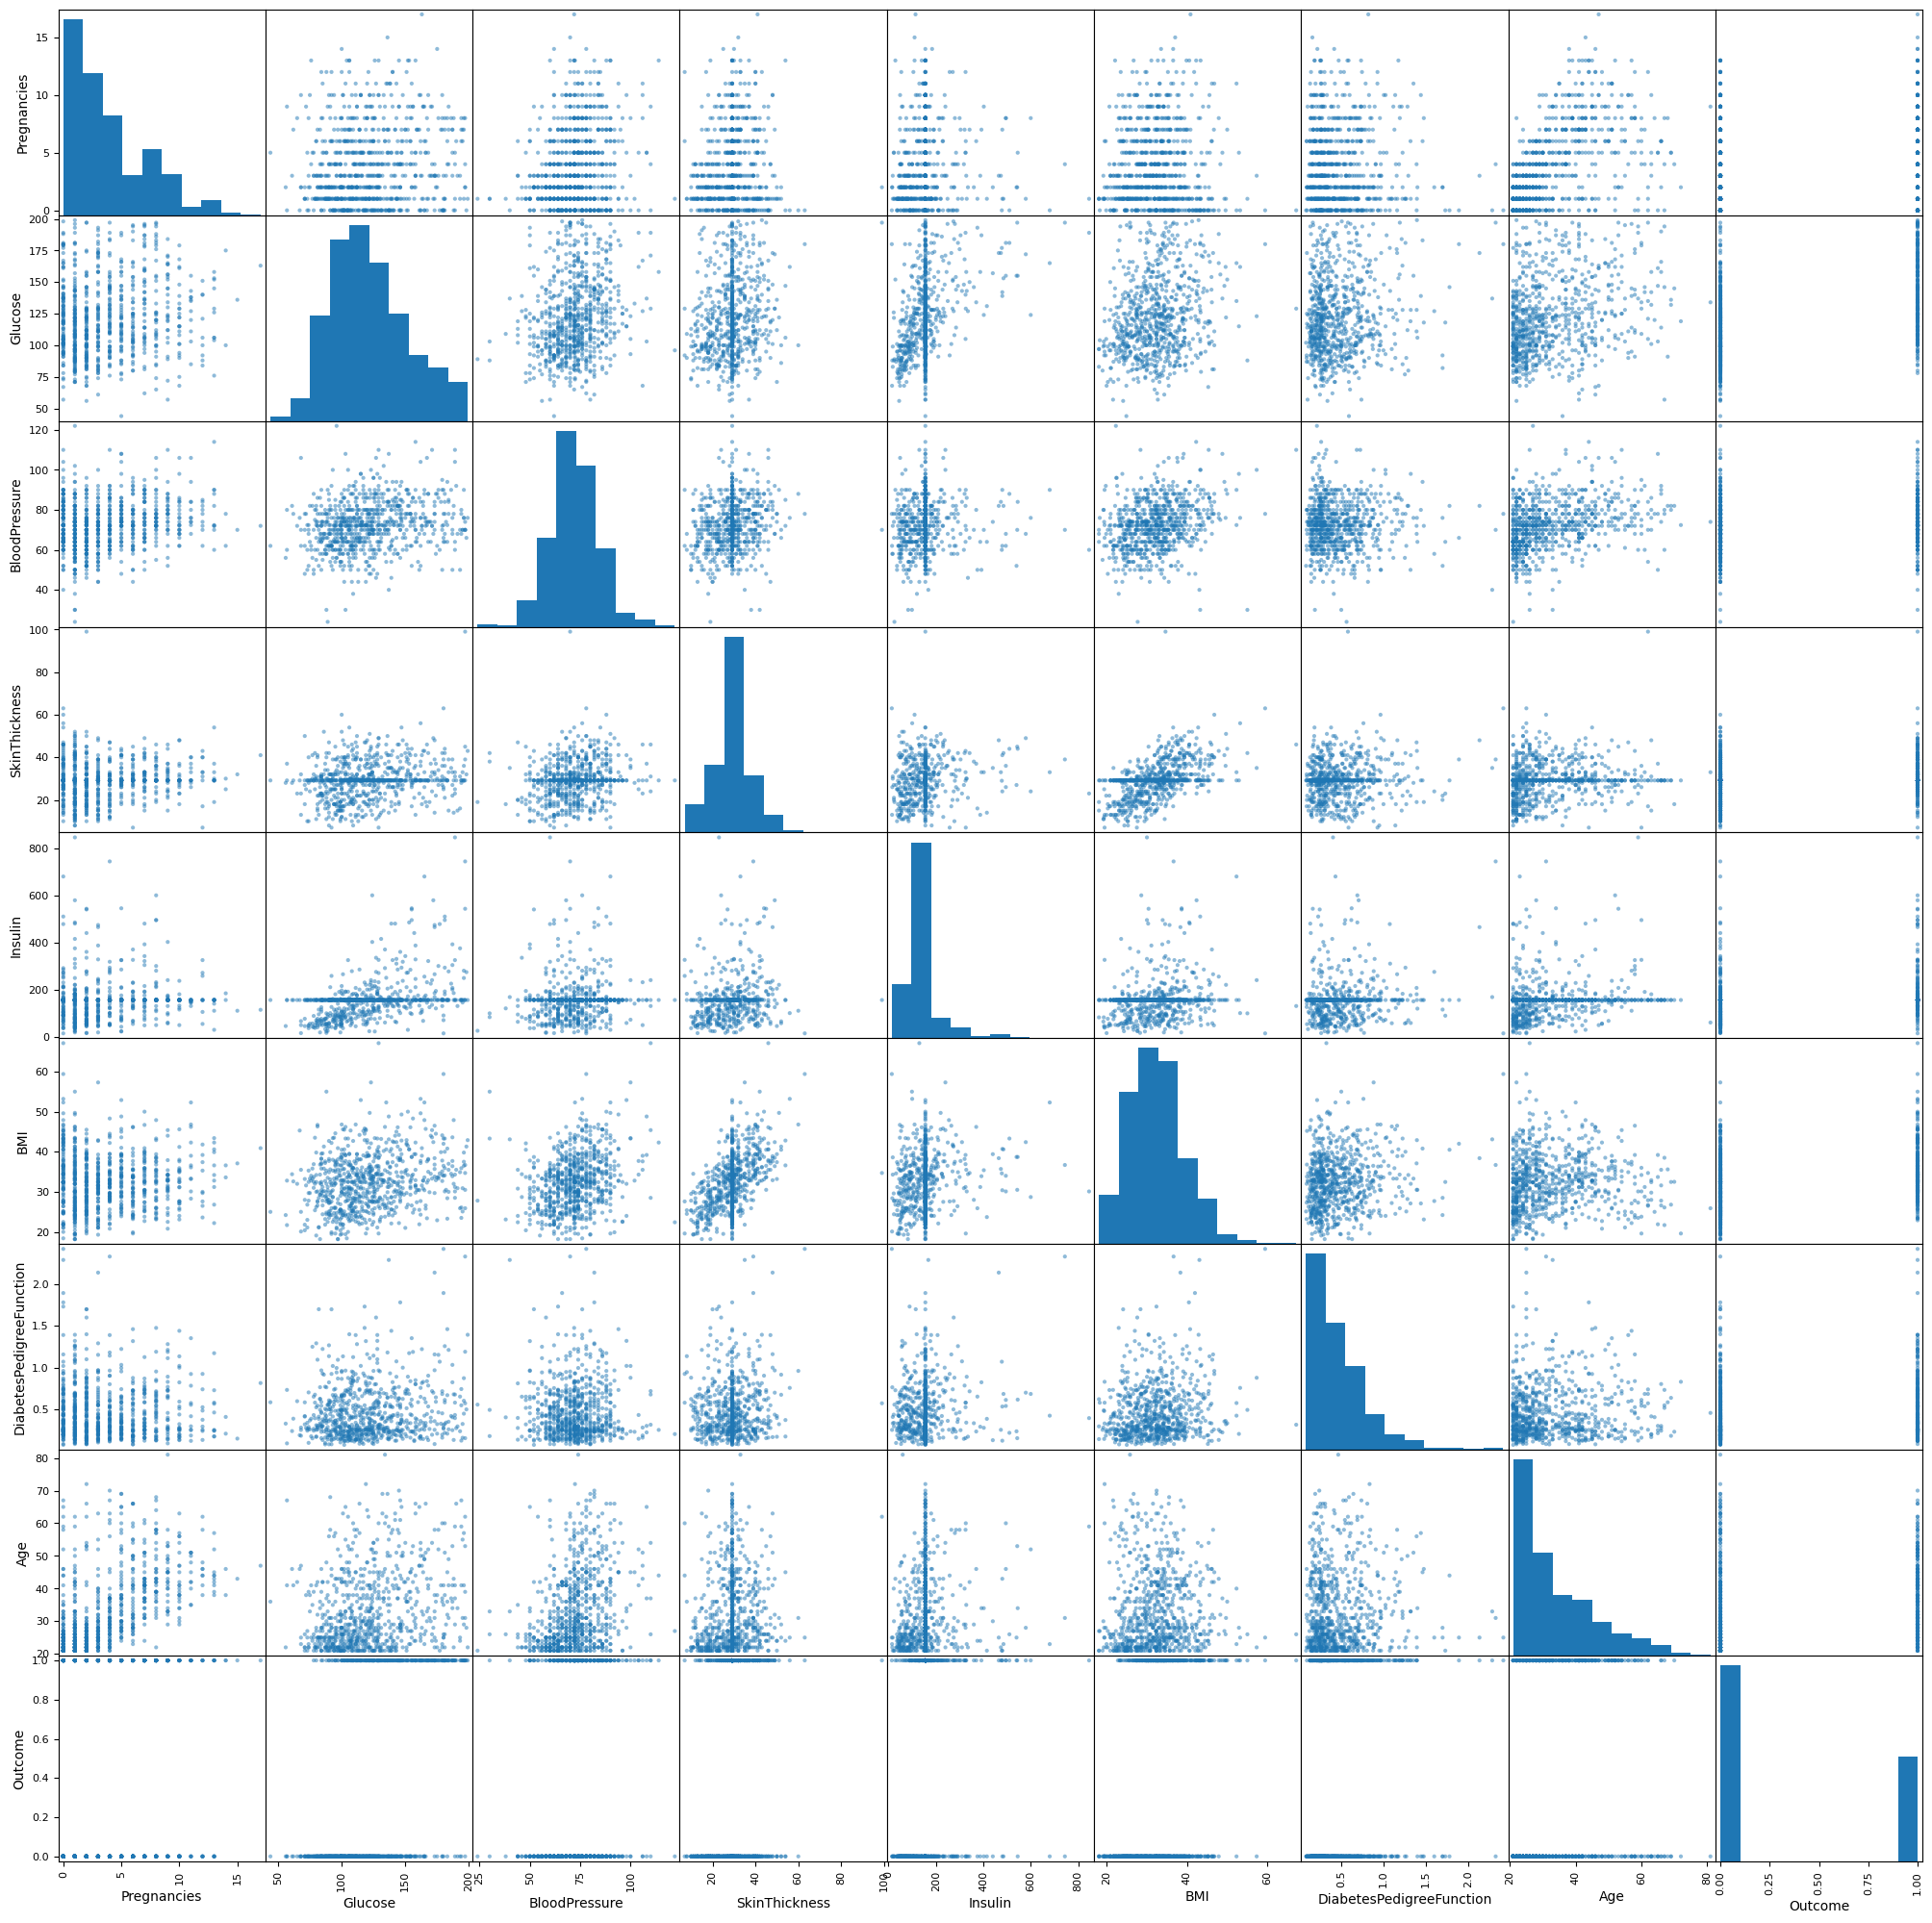

In [26]:
scatter_matrix(df, figsize=(25,25))
plt.show()

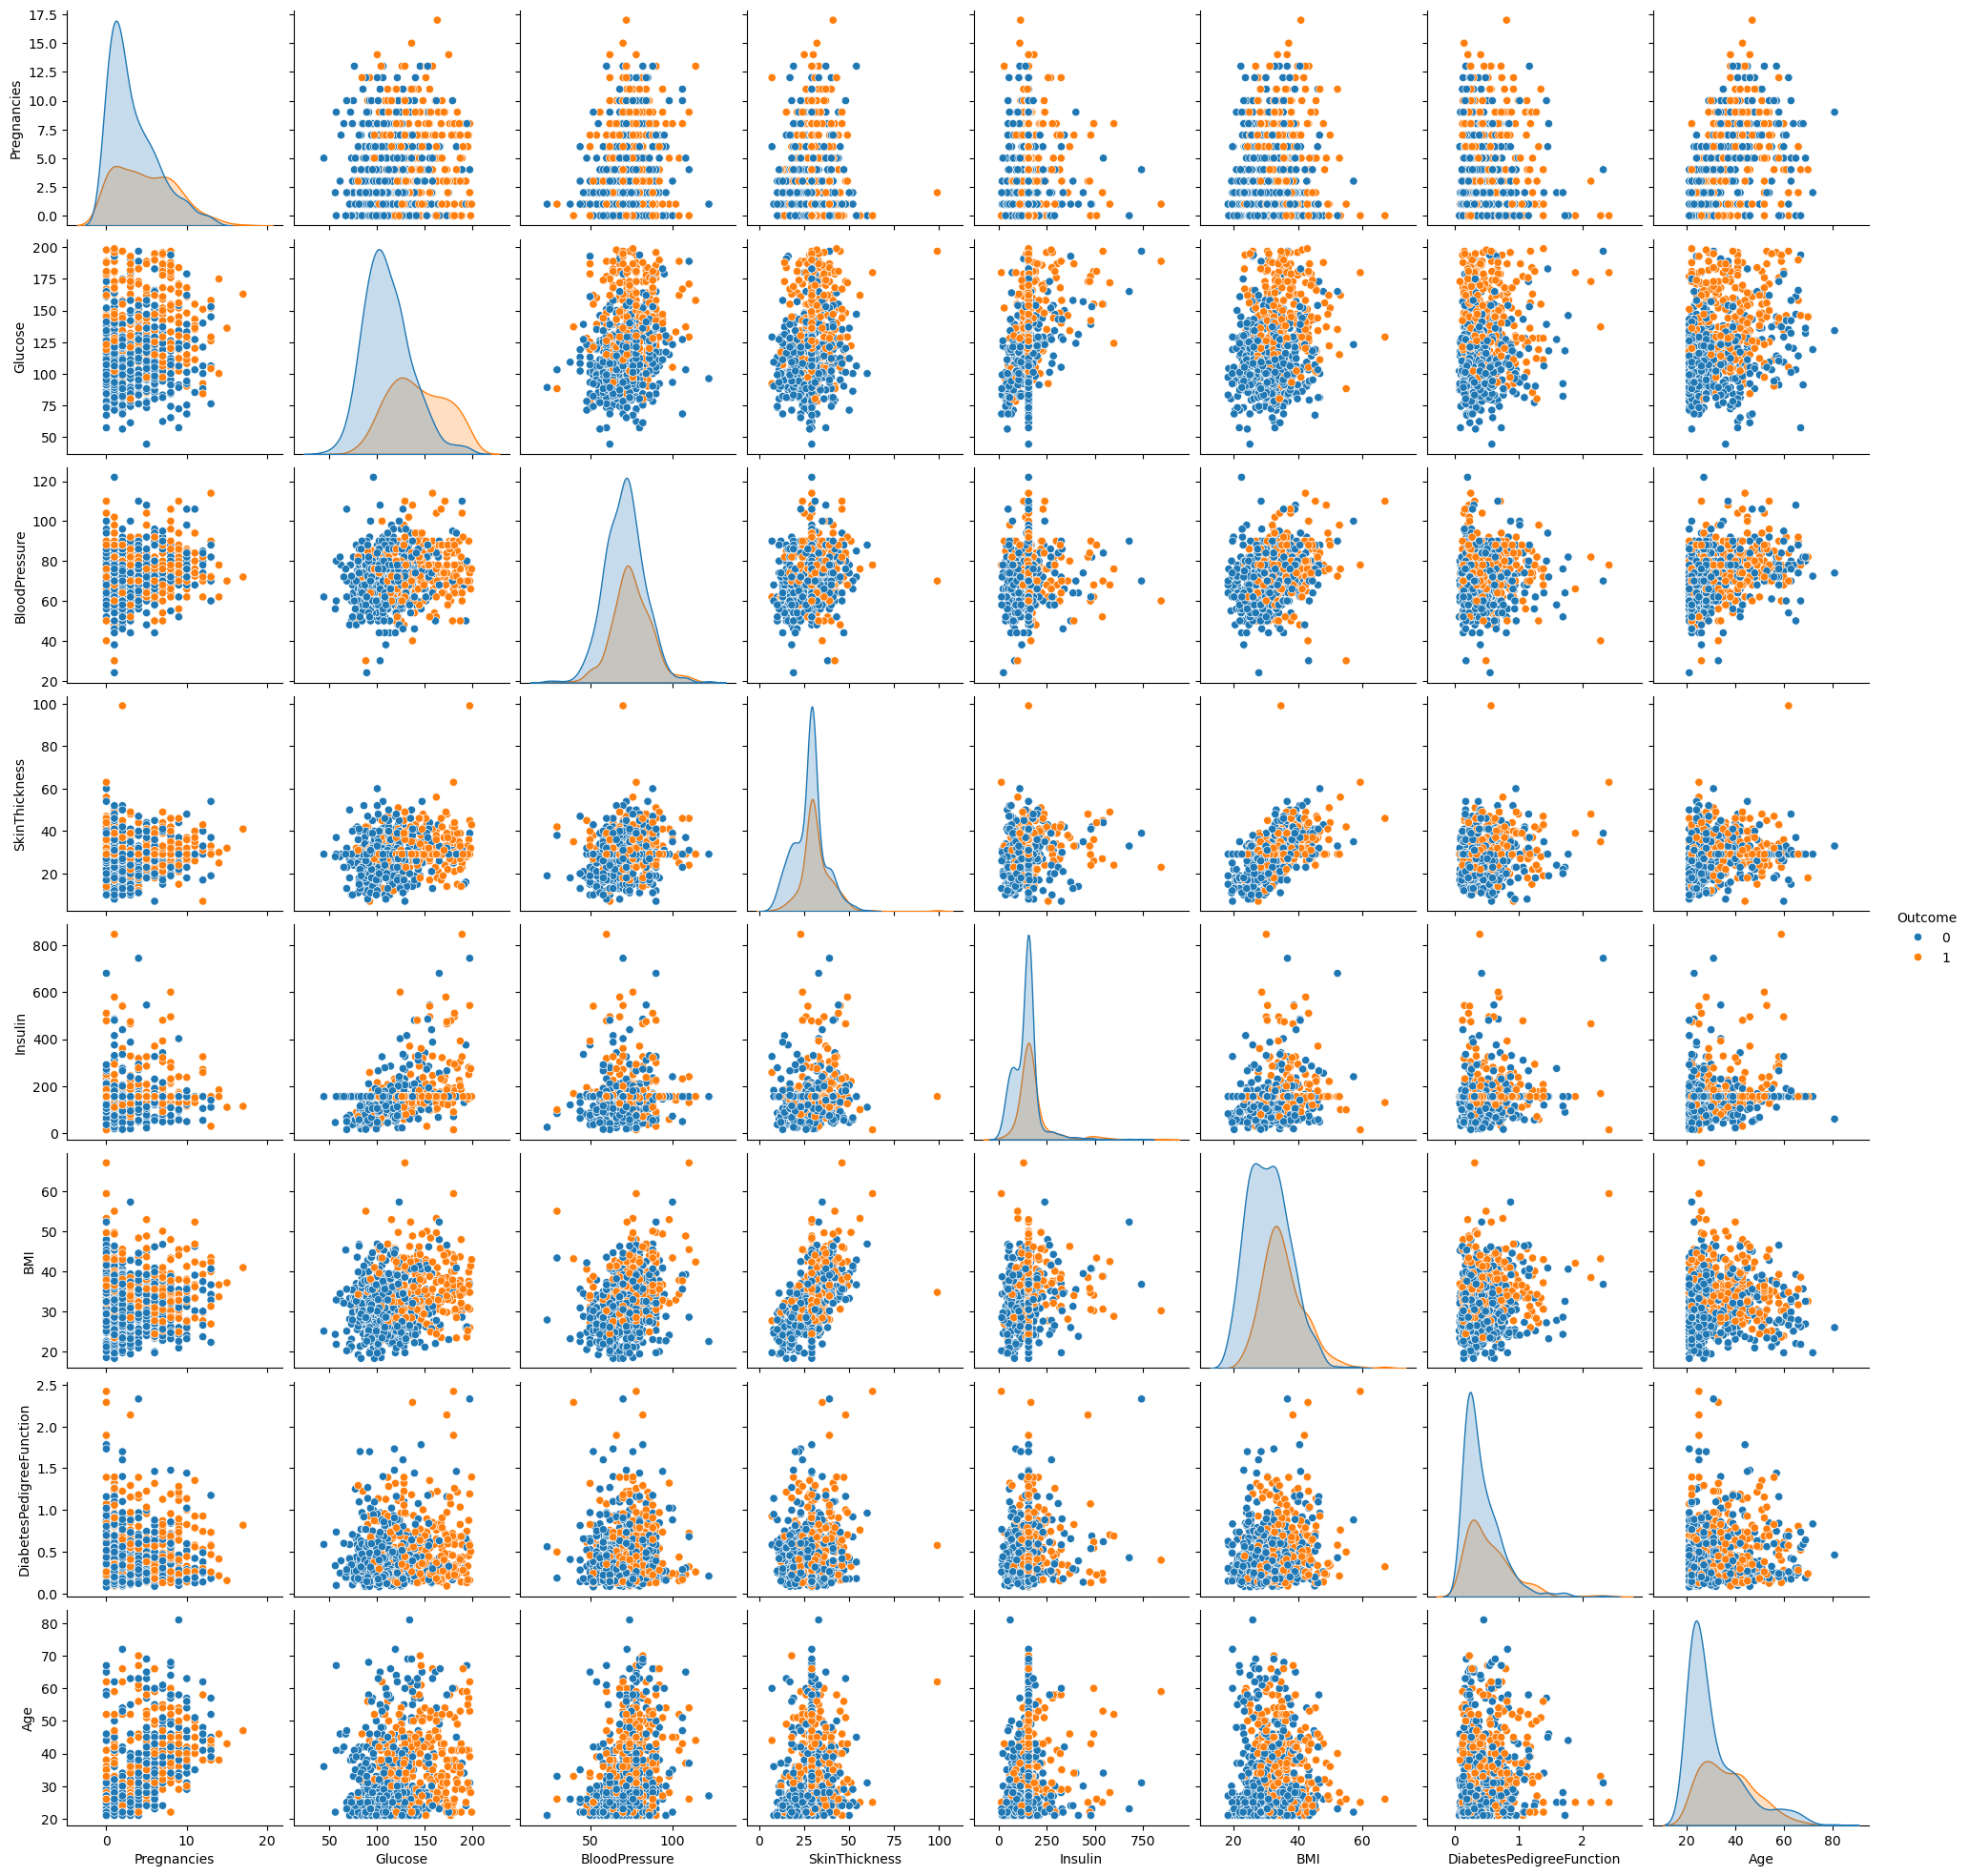

In [27]:
sns.pairplot(df, hue='Outcome')
plt.show()

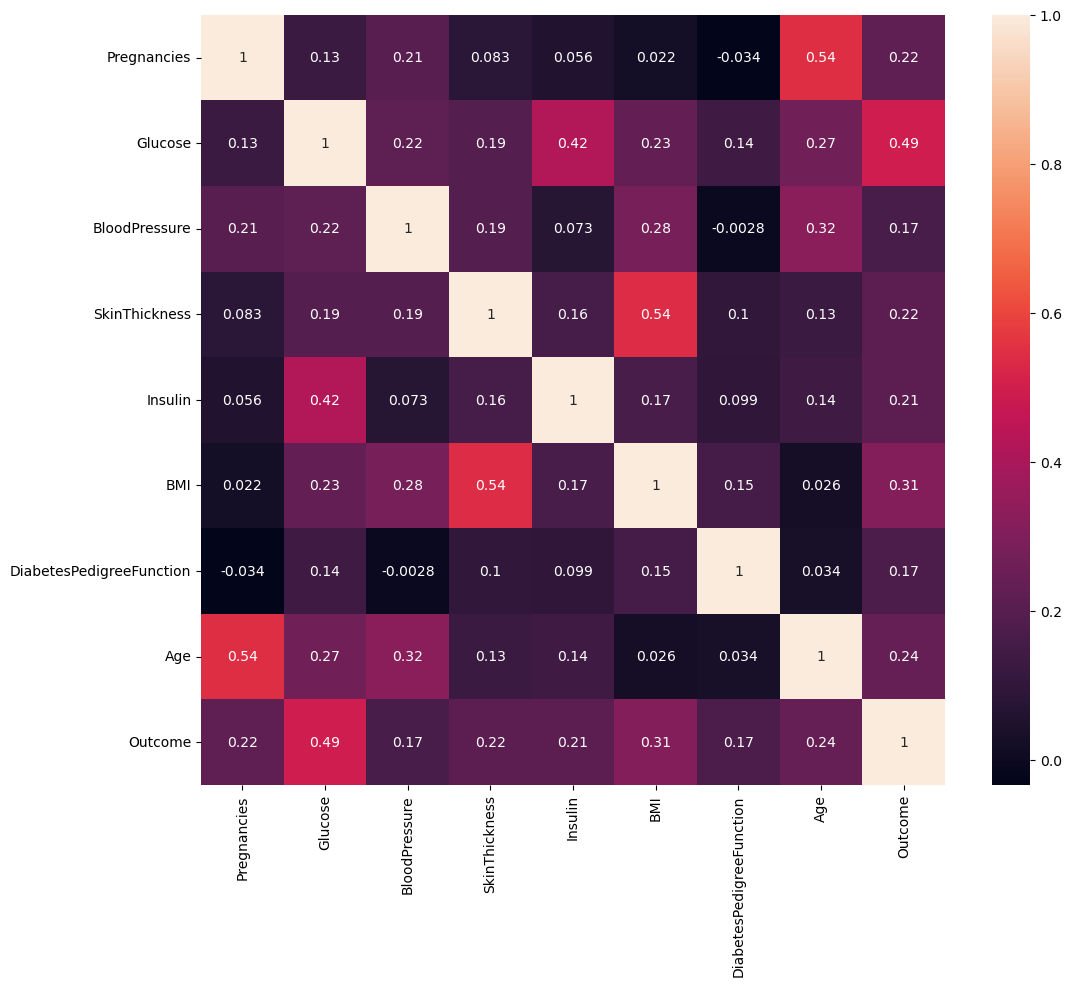

In [32]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(), annot=True)
plt.show()

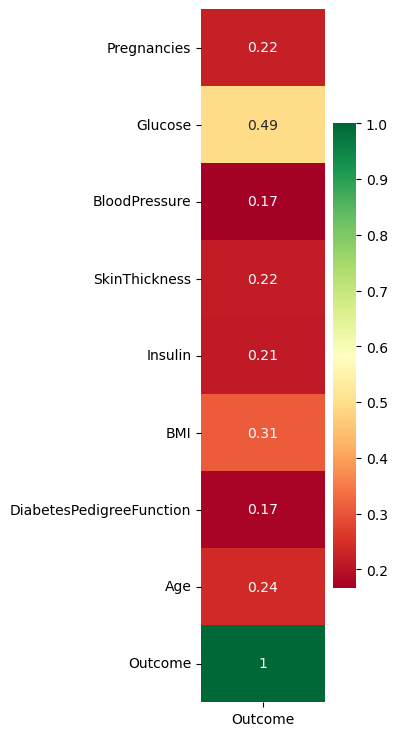

In [33]:
plt.figure(figsize=(2,9))
p=sns.heatmap(df.corr()[['Outcome']], annot=True, cmap='RdYlGn') # cmap to give color
plt.show()

## TRAIN TEST SPLIT

In [34]:
X = df.drop(['Outcome'], axis=1)
Y = df['Outcome']

In [35]:
print(X.Glucose.mean())
print(X.Glucose.std())
print(X.Glucose.max())
print(X.Glucose.min())

121.68676277850591
30.43594886720766
199.0
44.0


In [36]:
# minmax scaler or normalization method(range = (0,1))
# (x - min) / (max - min)
(148-44)/(199-44)

0.6709677419354839

In [37]:
# standard scalar or zscore scaled data will have mean = 0 and std = 1
# (x - mean) / (std)
(148-121.68)/30.43

0.8649359185014786

In [38]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()
sc.fit_transform(X)

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

In [44]:
X = pd.DataFrame(X, columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
X

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0       0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1      -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2       1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3      -0.844885 -1.074652      -0.529859  -7.004289e-01 -7.243887e-01   
4      -1.141852  0.503458      -2.680669   6.655021e-01  1.465506e-01   
..           ...       ...            ...            ...           ...   
763     1.827813 -0.680125       0.297376   2.145261e+00  2.877840e-01   
764    -0.547919  0.010298      -0.198965  -2.451185e-01 -3.345079e-16   
765     0.342981 -0.022579      -0.033518  -7.004289e-01 -5.125386e-01   
766    -0.844885  0.141808      -1.026200   8.087936e-16 -3.345079e-16   
767    -0.844885 -0.943143      -0.198965   2.101918e-01 -3.345079e-16   

          BMI  DiabetesPedigreeFunction       Age  
0    0.166292                  0.468492  1.425995  
1   -0.852531                 -0.365061 -0.190672  
2   -1.332833                  0.604397 -0.105584  
3   -0.634212                 -0.920763 -1.041549  
4    1.548980                  5.484909 -0.020496  
..        ...                       ...       ...  
763  0.064409                 -0.908682  2.532136  
764  0.632039                 -0.398282 -0.531023  
765 -0.910750                 -0.685193 -0.275760  
766 -0.343120                 -0.371101  1.170732  
767 -0.299456                 -0.473785 -0.871374  

[768 rows x 8 columns]

In [45]:
# importing the train_test_split function from sklearn.model_selection module

from sklearn.model_selection import train_test_split

In [46]:
# splitting the data into testing and training data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=1, stratify = Y)

In [47]:
# printing the input data that is used as training data

X_train

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
678    -0.250952 -0.022579  -1.687988e+00   8.087936e-16 -3.345079e-16   
53      1.233880  1.785672   1.455504e+00   5.516745e-01  1.700118e+00   
665    -0.844885 -0.318475   6.282695e-01   1.803778e+00 -2.771496e-01   
219     0.342981 -0.318475  -5.298590e-01   8.087936e-16 -3.345079e-16   
720     0.046014 -1.271916   1.124610e+00  -1.155739e+00 -3.345079e-16   
..           ...       ...            ...            ...           ...   
88      3.312645  0.470581  -1.989652e-01   3.240194e-01 -5.360775e-01   
137    -1.141852 -0.943143  -1.026200e+00  -4.727737e-01 -7.479276e-01   
645    -0.547919  1.161004   1.319287e-01   6.655021e-01  3.347841e+00   
308    -1.141852  0.207562  -3.644121e-01  -1.155739e+00  2.877840e-01   
332    -0.844885  1.917182   1.175571e-15   8.087936e-16 -3.345079e-16   

          BMI  DiabetesPedigreeFunction       Age  
678  0.515602                 -1.041567 -0.701198  
53   0.180846                 -0.014727  2.106697  
665  0.340947                 -0.769757 -0.786286  
219  0.777585                 -0.636871  0.660206  
720 -0.459557                 -0.467745  0.064591  
..        ...                       ...       ...  
88   0.675703                 -0.963044  0.830381  
137 -0.546884                  0.181581 -0.956462  
645  1.010459                 -1.020427 -0.275760  
308 -0.284901                  2.775863 -0.701198  
332  1.578089                 -0.573449  0.660206  

[614 rows x 8 columns]

In [48]:
# printing the input data that is used as testing data

X_test

Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
488     0.046014 -0.745879  -3.351824e-02  -1.383394e+00 -3.345079e-16   
413    -0.844885  0.700722   1.319287e-01  -8.142565e-01 -1.112781e+00   
112    -0.844885 -1.074652   2.973756e-01   5.516745e-01 -1.395247e+00   
222     0.936914 -0.088333   1.175571e-15   8.087936e-16 -3.345079e-16   
711     0.342981  0.141808   4.628226e-01  -2.451185e-01 -1.571789e+00   
..           ...       ...            ...            ...           ...   
139     0.342981 -0.548616  -3.351824e-02  -1.746338e-02  1.994354e+00   
178     0.342981  0.700722   4.628226e-01   8.087936e-16 -3.345079e-16   
654    -0.844885 -0.515738  -1.989652e-01  -1.312910e-01 -2.418413e-01   
110    -0.250952  1.621286  -3.351824e-02   4.378470e-01 -2.418413e-01   
102    -1.141852  0.108930   1.951845e+00   8.087936e-16 -3.345079e-16   

          BMI  DiabetesPedigreeFunction       Age  
488 -0.998077                 -0.537208 -0.445935  
413 -0.910750                 -0.651972 -1.041549  
112 -0.183019                 -0.845260 -0.871374  
222 -1.056296                 -0.793918  0.319855  
711 -0.415893                 -0.099290  0.575118  
..        ...                       ...       ...  
139  0.646594                 -0.944924 -0.445935  
178  1.825518                 -0.851300  1.170732  
654  0.253619                 -0.996266 -0.956462  
110  0.122628                 -0.824119 -0.786286  
102 -1.449270                 -0.633851 -1.041549  

[154 rows x 8 columns]

In [49]:
# the output labels to the response of input training data

Y_train

678    1
53     1
665    0
219    1
720    0
      ..
88     1
137    0
645    0
308    1
332    1
Name: Outcome, Length: 614, dtype: int64

In [50]:
# the ouput labels to the response of testing input data

Y_test

488    0
413    0
112    0
222    0
711    0
      ..
139    0
178    0
654    0
110    1
102    0
Name: Outcome, Length: 154, dtype: int64

## TRAINING THE MODEL WITH KNN CLASSIFIER

In [51]:
# importing knn classifier class from sklearn.neighbors module

from sklearn.neighbors import KNeighborsClassifier

In [57]:
testing_score = []
training_score = []
for i in range(1, 15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)
    training_score.append(knn.score(X_train,Y_train))
    testing_score.append(knn.score(X_test,Y_test))

In [58]:
training_score

[1.0,
 0.8534201954397395,
 0.8566775244299675,
 0.8273615635179153,
 0.8322475570032574,
 0.8273615635179153,
 0.8322475570032574,
 0.8110749185667753,
 0.8241042345276873,
 0.8013029315960912,
 0.8110749185667753,
 0.8013029315960912,
 0.8029315960912052,
 0.7899022801302932]

In [59]:
testing_score

[0.6688311688311688,
 0.7012987012987013,
 0.7467532467532467,
 0.7467532467532467,
 0.7272727272727273,
 0.7662337662337663,
 0.7532467532467533,
 0.7532467532467533,
 0.7792207792207793,
 0.7402597402597403,
 0.7727272727272727,
 0.7727272727272727,
 0.7857142857142857,
 0.7597402597402597]

In [60]:
# training and fitting the model

knn=KNeighborsClassifier(9) 
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [61]:
# using the trained model to make predictions on testing data

Y_knn = knn.predict(X_test) 
Y_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [63]:
# importing confusion matrix and accuracy score fucntion to find the accuracy of the model and to know the performance of the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [64]:
# finding the accuracy 

accuracy_score(Y_test,Y_knn)

0.7792207792207793

In [65]:
# creating the confusion matrix

confusion_matrix(Y_test,Y_knn)

array([[87, 13],
       [21, 33]], dtype=int64)

<Axes: >

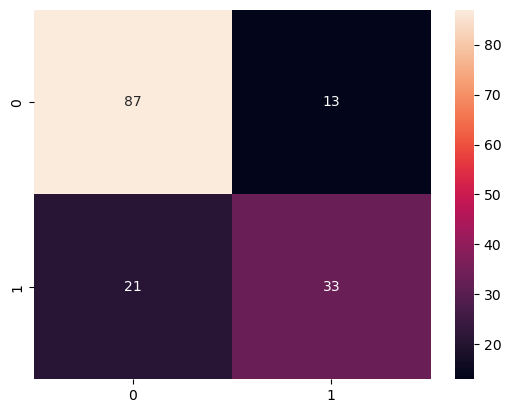

In [66]:
# creating heat map

sns.heatmap(confusion_matrix(Y_test,Y_knn),annot=True) 